In [137]:
# -*- coding: utf-8 -*-

from __future__ import division, unicode_literals

import re
import math
import networkx
import numpy as np

from konlpy import tag as taggers
from collections import Counter
from gensim.corpora import Dictionary, TextCorpus
from gensim.models import TfidfModel
from sklearn.cluster import Birch, DBSCAN, AffinityPropagation
from sklearn.feature_extraction import DictVectorizer


stopwords_ko = ["저", "것", "동시에", "몇", "고려하면", "관련이", "놀라다", "무엇", "어느쪽", "오", "정도의", "더구나", "아무도", "줄은모른다", "참", "아니", "휘익", "향하다", "응당", "알겠는가", "인젠", "그래서", "자신", "해서는", "둘", "이었다", "임에", "하도록시키다", "누구", "이때", "삼", "제외하고", "쿵", "하면", "좀", "그렇지않으면", "아니었다면", "이라면", "팍", "일", "통하여", "무엇때문에", "보아", "하게하다", "하는", "이르다", "타다", "까지도", "오직", "도달하다", "잠깐", "외에", "심지어", "하려고하다", "게다가", "후", "알", "비하면", "헉헉", "근거로", "월", "따라서", "않는다면", "일지라도", "함께", "이유는", "흥", "혼자", "관하여", "붕붕", "하다", "진짜로", "의해", "바와같이", "대하면", "퍽", "보다더", "그렇게", "끼익", "댕그", "시초에", "당장", "하는것만", "누가", "만이", "만일", "이지만", "하마터면", "꽈당", "만은", "우선", "없다", "휴", "하도록하다", "그런데", "비로소", "하게될것이다", "만큼 어찌됏든", "오히려", "을", "더라도", "안", "왜냐하면", "습니다", "줄은", "그리하여", "하", "어떻게", "대로", "기대여", "끙끙", "예를", "와르르", "이리하여", "이", "조차", "하고", "이젠", "뒤이어", "할줄알다", "반대로", "시각", "펄렁", "잇따라", "공동으로", "비록", "가까스로", "여덟", "비슷하다", "이상", "차라리", "이어서", "모두", "툭", "조차도", "헉", "부터", "혹시", "않고", "우리", "삐걱", "여보시오", "허", "해요", "견지에서", "하기는한데", "토하다", "않으면", "이봐", "관계가", "한다면", "시작하여", "연이서", "이외에도", "그", "운운", "에게", "그럼에도", "예", "만약에", "했어요", "결과에", "제", "오자마자", "것들", "약간", "것과", "일때", "셋", "각종", "아이구", "같은", "향해서", "일것이다", "해야한다", "아이야", "로", "편이", "등등", "해도좋다", "하기에", "김에", "몰랏다", "같이", "하도다", "즉시", "갖고말하자면", "우에", "어느", "허허", "하자마자", "에서", "그래도", "하여야", "된이상", "까악", "한켠으로는", "많은", "그중에서", "사", "낼", "뿐만", "저쪽", "어쩔수", "어떤것들", "물론", "결론을", "이만큼", "이렇게되면", "소인", "바꾸어말하면", "들", "이렇구나", "하물며", "얼마간", "얼마든지", "한항목", "하는것도", "졸졸", "한마디", "말할것도", "만약", "남들", "총적으로", "허걱", "그리고", "따지지", "구체적으로", "못하다    하기보다는", "언제", "따르는", "구토하다", "앞에서", "대해서", "아", "앞의것", "비걱거리다", "헐떡헐떡", "어찌하든지", "입장에서", "의", "마저", "바로", "하기만", "않기", "또한", "쓰여", "위해서", "의거하여", "인", "아니면", "를", "사람들", "할수있다", "일곱", "근거하여", "한적이있다", "함으로써", "낫다", "어떤것", "방면으로", "중의하나", "어", "무릎쓰고", "저것만큼", "서술한바와같이", "그런즉", "들자면", "하지", "아이고", "불문하고", "만", "마저도", "얼마만큼", "예컨대", "이렇게말하자면", "연관되다", "않다면", "들면", "이쪽", "의지하여", "여섯", "그저", "아니다", "그렇지만", "기준으로", "되어", "가", "무렵", "즉", "말하면", "어찌", "그럼", "그위에", "그런", "조금", "매번", "혹은", "이천구", "중에서", "따름이다", "하기", "가령", "잠시", "아무거나", "하기보다는", "주저하지", "당신", "봐라", "그렇지", "자기집", "할지라도", "요만한걸", "우르르", "못하다", "왜", "이렇게", "퉤", "관계없이", "그래", "대해", "쪽으로", "저것", "자기", "아홉", "지만", "구", "하지마", "따위", "하지만", "나", "해도", "전자", "그만이다", "안된다", "까닭으로", "되다", "오르다", "딱", "다음에", "너희들", "점에서", "아이쿠", "쾅쾅", "종합한것과같이", "할수있어", "그치지", "비교적", "륙", "되는", "개의치않고", "엉엉", "하든지", "때가", "영차", "바꿔", "더불어", "주룩주룩", "따라", "이용하여", "우리들", "여기", "더욱이는", "하더라도", "입각하여", "여러분", "마치", "하느니", "너", "어디", "제각기", "밖에", "봐", "위하여", "팔", "요만큼", "가서", "아니라면", "지든지", "참나", "할만하다", "타인", "든간에", "하겠는가", "거바", "겨우", "다음", "이러한", "이럴정도로", "각자", "어때", "지말고", "형식으로", "그러한즉", "아니나다를가", "할", "불구하고", "지경이다", "어떠한", "기점으로", "할때", "등", "다시", "시키다", "답다", "소생", "라", "로써", "각", "부류의", "알았어", "훨씬", "위에서", "뿐이다", "시간", "그러나", "하곤하였다", "일단", "막론하고", "좋아", "솨", "이곳", "뿐만아니라", "아울러", "옆사람", "다수", "예하면", "령", "어떤", "어떻해", "할수록", "말하자면", "전후", "메쓰겁다", "에", "으로써", "이번", "하면된다", "이것", "딩동", "양자", "달려", "본대로", "탕탕", "마음대로", "쉿", "미치다", "다시말하면", "동안", "그러니까", "과연", "뚝뚝", "거의", "이천팔", "이로", "않도록", "또", "한하다", "아래윗", "수", "다소", "어느것", "까지", "남짓", "저기", "관한", "무슨", "그에", "년도", "삐걱거리다", "이러이러하다", "와", "넷", "쳇", "논하지", "습니까", "이천육", "기타", "오로지", "어느곳", "설령", "할지언정", "칠", "다만", "반드시", "한데", "곧", "의해서", "얼마나", "아니라", "상대적으로", "너희", "있다", "인하여", "다섯", "생각이다", "몰라도", "정도에", "버금", "까닭에", "얼마큼", "전부", "로부터", "힘입어", "틈타", "해도된다", "나머지는", "흐흐", "그때", "하여금", "모", "이런", "바꾸어서", "비추어", "각각", "설사", "이래", "비길수", "하지마라", "응", "다른", "듯하다", "보는데서", "어쨋든", "대하여", "좍좍", "으로", "여차", "틀림없다", "과", "고로", "요컨대", "일반적으로", "줄", "하는바", "그들", "요만한", "윙윙", "콸콸", "어기여차", "언젠가", "이와", "할망정", "이천칠", "네", "없고", "둥둥", "겸사겸사", "그러므로", "안다", "거니와", "년", "여부", "때문에", "된바에야", "향하여", "때", "하하", "및", "오호", "하면서", "더군다나", "한", "이유만으로", "어이", "하나", "저희", "더욱더", "두번째로", "바꾸어말하자면", "이와같다면", "이르기까지", "단지", "그러면", "야", "결국", "영", "뒤따라", "즈음하여", "도착하다", "와아", "다음으로", "같다", "자", "아하", "생각한대로", "외에도", "의해되다", "설마", "으로서", "보면", "할뿐", "첫번째로", "아야", "어째서", "하는것이", "하구나", "않다", "힘이", "육", "그러니", "여전히", "어찌됏어", "어찌하여", "어느해", "앗", "게우다", "보드득", "관해서는", "자마자", "매", "하고있었다", "어느때", "여", "실로", "해봐요", "얼마", "아이"]


class LexRankError(Exception):
    pass


class Sentence(object):

    def __init__(self, text, tokens=[], index=0):
        self.index = index
        self.text = text
        self.tokens = tokens
        self.counter = Counter(self.tokens)
        self.pagerank = 0

    def __unicode__(self):
        return self.text

    def __str__(self):
        return str(self.index)

    def __repr__(self):
        try:
            return self.text.encode('utf-8')
        except:
            return self.text

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index
    
class Token(object):

    def __init__(self, index, word, tag):
        self.index = index
        self.word = word
        self.tag = tag
        self.tfidf = 0

    def __unicode__(self):
        return self.word

    def __str__(self):
        return self.word

    def __repr__(self):
        try:
            return self.word.decode('utf8')
        except:
            return self.word

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index


class SentenceFactory(object):

    def __init__(self, tagger, useful_tags, delimiters, min_token_length, stopwords, **kwargs):
        if tagger == 'twitter':
            self.tagger = taggers.Twitter()
            self.tagger_options = {
                'norm': bool(kwargs.get('norm', True)),
                'stem': bool(kwargs.get('stem', True)),
            }
        elif tagger == 'komoran':
            self.tagger = taggers.Komoran()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'hannanum':
            self.tagger = taggers.Hannanum()
            self.tagger_options = {
                'ntags': int(kwargs.get('ntags', 9)),
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'kkma':
            self.tagger = taggers.Kkma()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'mecab':
            self.tagger = taggers.Mecab()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        else:
            raise LexRankError("available taggers are: twitter, komoran, hannanum, kkma, mecab")
        self.useful_tags = useful_tags
        self.delimiters = delimiters
        self.stopwords = stopwords
        self.min_token_length = min_token_length
        self.splitter = self.splitterer()
        self.pos = lambda text: self.tagger.pos(text, **self.tagger_options)

    def splitterer(self):
        escaped_delimiters = '|'.join([re.escape(delimiter) for delimiter in self.delimiters])
        return lambda value: re.split(escaped_delimiters, value)

    def text2tokens(self, text, idx):
        tokens = []
        word_tag_pairs = self.pos(text)
        for word, tag in word_tag_pairs:
            if word in self.stopwords:
                continue
            if tag not in self.useful_tags:
                continue
          #  tokens.append("{}/{}".format(word, tag))
            tokens.append(Token(idx, word, tag))
        return tokens

    def text2sentences(self, text):
        candidates = self.splitter(text.strip())
        sentences = []
        index = 0
        for candidate in candidates:
            while len(candidate) and (candidate[-1] == '.' or candidate[-1] == ' '):
                candidate = candidate.strip(' ').strip('.')
            if not candidate:
                continue
            tokens = self.text2tokens(candidate, index)
            if len(tokens) < self.min_token_length:
                continue
            sentence = Sentence(candidate, tokens, index)
            sentences.append(sentence)
            index += 1
        return sentences


class SentenceCorpus(TextCorpus):

    def __init__(self, sentences, no_below=3, no_above=0.8, max_size=None):
        self.metadata = False
        self.sentences = sentences
        self.dictionary = Dictionary(self.get_texts(), prune_at=max_size)
        self.dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=max_size)
        self.dictionary.compactify()
        self.bows = [self.dictionary.doc2bow(tokens) for tokens in self.get_texts()]

    def get_texts(self):
        for sentence in self.sentences:
            yield map(str, sentence.tokens)


class LexRank(object):
    
    def __init__(self, similarity='cosine', decay_window=20, decay_alpha=0.25, clustering='dbscan', tagger='twitter', useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'Josa', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'], delimiters=['. ', '\n', '.\n'], min_token_length=2, stopwords=stopwords_ko, no_below_word_count=2, no_above_word_portion=0.85, max_dictionary_size=None, min_cluster_size=2, similarity_threshold=0.85, matrix_smoothing=False, n_clusters=None, compactify=True, **kwargs):
        self.decay_window = decay_window
        self.decay_alpha = decay_alpha
        if similarity == 'cosine':  # very, very slow :(
            self.vectorizer = DictVectorizer()
            self.uniform_sim = self._sim_cosine
        elif similarity == 'jaccard':
            self.uniform_sim = self._sim_jaccard
        elif similarity == 'normalized_cooccurrence':
            self.uniform_sim = self._sim_normalized_cooccurrence
        else:
            raise LexRankError("available similarity functions are: cosine, jaccard, normalized_cooccurrence")
        self.sim = lambda sentence1, sentence2: self.decay(sentence1, sentence2) * self.uniform_sim(sentence1, sentence2)
        self.factory = SentenceFactory(tagger=tagger, useful_tags=useful_tags, delimiters=delimiters, min_token_length=min_token_length, stopwords=stopwords, **kwargs)
        if clustering == 'birch':
            self._birch = Birch(threshold=0.99, n_clusters=n_clusters)
            self._clusterer = lambda matrix: self._birch.fit_predict(1 - matrix)
        elif clustering == 'dbscan':
            self._dbscan = DBSCAN()
            self._clusterer = lambda matrix: self._dbscan.fit_predict(1 - matrix)
        elif clustering == 'affinity':
            self._affinity = AffinityPropagation()
            self._clusterer = lambda matrix: self._affinity.fit_predict(1 - matrix)
        elif clustering is None:
            self._clusterer = lambda matrix: [0 for index in range(matrix.shape[0])]
        else:
            raise LexRankError("available clustering algorithms are: birch, markov, no-clustering(use `None`)")
        self.no_below_word_count = no_below_word_count
        self.no_above_word_portion = no_above_word_portion
        self.max_dictionary_size = max_dictionary_size
        self.similarity_threshold = similarity_threshold
        self.min_cluster_size = min_cluster_size
        self.matrix_smoothing = matrix_smoothing
        self.compactify = compactify
        self.mine_tfidf = []
    def one_vector(self):
        res = []
        for i in range(self.num_sentences-1):
            s1 = {word_id: tfidf for word_id, tfidf in self.sentences[i].tfidf}
            s2 = {word_id: tfidf for word_id, tfidf in self.sentences[i].tfidf}
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}], 문장[{}]: tfidf \n{} \n{}".format(i,i+1,s1,s2), end='\n')
            print("문장[{}], 문장[{}]: vector\n{} \n{}".format(i,i+1,vector1,vector2), end='\n\n')           
        return res
    
    def print_vector(self, size=5):
        res = []
        for i in range(self.num_sentences-size-1):
            s1 = {}
            s2 = {}
            for j in range(size):
                s1.update({word_id*10+i+j: tfidf for word_id, tfidf in self.sentences[i+j].tfidf})
                s2.update({word_id*10+i+j+1: tfidf for word_id, tfidf in self.sentences[i+j+1].tfidf})
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}-{}], 문장[{}-{}]: tfidf \n{} \n{}".format(i,i+size,i+1,i+1+size,s1,s2), end='\n')
            print("문장[{}-{}], 문장[{}-{}]: vector\n{} \n{}".format(i,i+size,i+1,i+1+size,vector1,vector2), end='\n\n')           
        return res
    

        
        
    def summarize(self, text):
        self.sentences = self.factory.text2sentences(text)
        self.num_sentences = len(self.sentences)
        self.corpus = SentenceCorpus(self.sentences, self.no_below_word_count, self.no_above_word_portion, self.max_dictionary_size)
        self.model = TfidfModel(self.corpus.bows, id2word=self.corpus.dictionary, normalize=True)
        self.tfidfs = self.model[self.corpus.bows]
        self._inject_tfidfs()
        self._build_matrix()
        self._clustering()
        if self.compactify:
            self._compactify()
        self.graphs = []
        for i in range(self.num_clusters):
            graph = self.sentences2graph(self.clusters[i])
            pagerank = networkx.pagerank(graph, weight='weight')
            for k, v in pagerank.items():
                   k.pagerank = v
            self.clusters[i] = sorted(pagerank, key=pagerank.get, reverse=True)
            self.graphs.append(graph)

    def _sim_jaccard(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        p = sum((sentence1.counter & sentence2.counter).values())
        q = sum((sentence1.counter | sentence2.counter).values())
        return p / q if q else 0

    def _sim_cosine(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        sentence1_tfidf = {word_id: tfidf for word_id, tfidf in sentence1.tfidf}
        sentence2_tfidf = {word_id: tfidf for word_id, tfidf in sentence2.tfidf}
        vector1, vector2 = self.vectorizer.fit_transform([sentence1_tfidf, sentence2_tfidf]).toarray()
#         if sentence1_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence1_tfidf)
#         elif sentence2_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence2_tfidf)
        return vector1.dot(vector2)

    def build_tf_matrix(self):
        self.tf_list = []
        for s in self.sentences:
            self.tf_list.append({word_id: tfidf for word_id, tfidf in s.tfidf})
        self.tf_matrix = np.zeros((self.num_sentences, len(self.corpus.dictionary)))
        for i,d in enumerate(self.tf_list):
            for k,v in d.items():
                self.tf_matrix[i,k] = v
        return self.tf_matrix

    def _sim_normalized_cooccurrence(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        return len(set(sentence1.tokens) & set(sentence2.tokens)) / (math.log(len(sentence1.tokens)) + math.log(len(sentence2.tokens)))

    def decay(self, sentence1, sentence2):
        distance = abs(sentence1.index - sentence2.index)
        closeness = max(self.decay_window - distance, 0) / self.decay_window
        return math.pow(closeness, self.decay_alpha)

    def _inject_tfidfs(self):
        for index in range(self.num_sentences):
            bow = self.corpus.bows[index]
            self.sentences[index].bow = bow
            self.sentences[index].tfidf = self.model[bow]

    def _build_matrix(self):
        self.matrix = np.zeros((self.num_sentences, self.num_sentences))
        for sentence1 in self.sentences:
            for sentence2 in self.sentences:
                self.matrix[sentence1.index, sentence2.index] = self.sim(sentence1, sentence2)
        if self.matrix_smoothing:
            for index in range(self.num_sentences):
                self.matrix[index, index] = 0
                self.matrix[index, index] = max(self.matrix[index])

    def sentences2graph(self, sentences):
        graph = networkx.Graph()
        graph.add_nodes_from(sentences)
        for sentence1 in sentences:
            for sentence2 in sentences:
                weight = self.matrix[sentence1.index, sentence2.index]
                if weight:
                    graph.add_edge(sentence1, sentence2, weight=weight)
        return graph

    def _clustered(self):
        self.clusters = [cluster for cluster in self.clusters if len(cluster) >= self.min_cluster_size]
        self.num_clusters = len(self.clusters)
        self.clusters = sorted(self.clusters, key=lambda cluster: len(cluster), reverse=True)

    def _clustering(self):
        cls = self._clusterer(self.matrix)
        bucket = {}
        for index in range(len(cls)):
            key = str(cls[index])
            if key not in bucket:
                bucket[key] = []
            bucket[key].append(self.sentences[index])
        self.clusters = bucket.values()
        self._clustered()

    def _compactify(self):
        clusters = []
        for cluster in self.clusters:
            compact_cluster = []
            cluster_size = len(cluster)
            for i in range(cluster_size):
                cluster[i].duplicated = False
            for i in range(cluster_size):
                if cluster[i].duplicated:
                    continue
                for j in range(i + 1, cluster_size):
                    if cluster[j].duplicated:
                        continue
                    if self.uniform_sim(cluster[i], cluster[j]) > self.similarity_threshold:
                        cluster[j].duplicated = True
                compact_cluster.append(cluster[i])
            clusters.append(compact_cluster)
        self.clusters = clusters
        self._clustered()

    def _verbose(self):
        summaries = sorted(self.summaries, key=lambda sentence: sentence.index)
        return [sentence.text for sentence in summaries]

    def probe(self, k=None):
        if not hasattr(self, 'clusters'):
            raise LexRankError("summarize it first")
        if not k:
            k = max(2, self.num_clusters)
        if k < 0:
            raise LexRankError("appropriate value for `k`: float(0 ~ 1) for compress rate, or natural number for exact number of sentences")
        if k > self.num_sentences:
            raise LexRankError("this will not give a summarization")
        if k < 1:
            k = int(self.num_sentences * k)
        self.summaries = []
        ends = np.array([len(cluster) for cluster in self.clusters])
        drones = np.zeros(ends.shape)
        for i in range(self.num_clusters):
            self.summaries.append(self.clusters[i][0])
            drones[i] += 1
            if len(self.summaries) == k:
                return self._verbose()
        while True:
            branch = np.array([drones + 1, ends]).min(axis=0) / ends
            leach = int(branch.argmin())
            drone = int(drones[leach])
            self.summaries.append(self.clusters[leach][drone])
            drones[leach] += 1
            if len(self.summaries) == k:
                return self._verbose()

In [230]:
sentences=['''추석에 고향 내려가려는데 뒤늦게 학교 귀향 버스가 없어진 것을 알았어요. 급하게 버스표를 예매하느라 앞당겨서 출발해요.
고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다.
최근 학생들을 태우고 추석마다 지방으로 내려가던 서울 시내 대학들의 귀향 버스가 점차 사라지는 추세다.
22일 서울대 총학생회에 따르면 올해 추석 시간대별 노선당 인원이 기준인 35명보다 적어 귀향 버스 전 노선을 운영하지 않는다. 총학생회는 애초 7개 노선을 운행하기 위한 수요조사를 했지만, 신청자가 26명에 불과했다.
지난해 신청자가 35명에 그쳐 귀향 버스를 운행하지 않은 데 이어 2년째 운행하지 않으면서 사실상 귀향 버스 폐지 수순을 밟고 있다.
서울대 귀향 버스는 10년 전인 2008년에는 신청자가 600여명에 달한 것으로 알려졌다. 복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다.
하지만 이후 귀향 버스 신청자는 점차 감소했다. 2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다. 
총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다.
연세대도 올해 추석 때 귀향 버스를 운영하지 않는다. 
연세대 관계자는 점점 귀향 버스를 이용하는 학생이 줄다가 지난해에는 1~2대 운행한 것으로 안다고 밝혔다. 서강대 역시 올해 귀향 버스를 운행하지 않는다.
이화여대는 한가위 귀향단으로 이름 붙인 귀향 버스 운행을 2015년 중단했다. 당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다.
고려대는 버스 14대를 대절해 13개 노선을 운영한다. 지난해 귀향 버스 신청자가 290여명이었지만 올해는 236명으로 줄었다.
한양대는 지난해 추석에 이어 올해 추석에도 6개 노선 6대 버스를 운행한다. 2016년 13개 노선을 운행했지만, 신청자 감소로 지난해 6개 노선을 줄인 데 이어 올해도 지난해 수준을 유지했다.
1994년에는 서울의 대학 학생회가 연합해 버스를 대절하며 대규모 귀향 버스를 운행했다. 당시 연세대, 서강대, 이화여대 등 서부지역 대학생 4천200여명이 귀향 버스를 이용한 바 있다.
서울 시내 한 대학 관계자는 아무래도 KTX가 새로 생기면서 버스보다 기차를 선호하는 학생들이 많아진 것 아니겠냐라면서 올해는 연휴도 짧고 취업난이라는 외부적 상황 때문에 귀향하는 학생이 줄어들 것으로 추정된다고 말했다.
명절이면 어김없이 등장하는 단어 명절 증후군. 이로 인해 추석을 앞두고 청와대 국민청원 게시판에는 명절을 없애자는 청원까지 여러 번 등장했다. 
본격적인 추석 연휴가 시작되기 전 청와대 국민청원 게시판에 추석, 명절과 같은 키워드로 검색했다. 지난 8월 말부터 명절을 폐지해달라는 취지의 청원이 잇따라 올라와 있었다. 지난 설과 추석에 이어 이번 명절에도 이어진 청원이다.
청원 내용을 보면 대체로 현대 사회에서 대가족이 모여 음식을 하고 차례를 지내는 의미가 퇴색하고 있음을 지적했다. 명절이 부부 갈등을 유발한다는 주장도 이어졌다.
명절 폐지를 주장한 한 청원자는 명절만 되면 음식을 준비하는 여성들도, 장시간 운전하는 남성들도 모두 힘들어 이혼율이 증가한다며 명절로 인한 부담을 줄여달라라고 말했다.
실제 지난해 법원행정처 통계에 따르면 2016년 기준 설날과 추석 연휴 전후로 하루 평균 577건의 이혼신청서가 접수됐다. 명절 아닌 평상시 하루 평균 이혼 신청이 298건인 것과 비교하면 두 배 수준이다.
자신을 결혼 20년 차 주부라고 밝힌 한 청원자는 차례를 지내는 집은 명절이 갈등과 스트레스의 원인이라며 제사가 따로 있는데, 왜 명절에 차례를 지내야 하나라고 의문을 제기했다.
이어 산소에 미리 가서 벌초하고 간소하게 음식으로 조상에게 예를 갖추면 된다라며 명절의 간소화를 요구하기도 했다.
또 다른 청원자는 명절에 시댁에 가자마자 앞치마 두른다. 시댁을 나서는 순간까지 편히 앉아 있지를 못했다라고 명절 스트레스를 호소했다.
전통을 고집할 것이 아니라 바꿔나가자는 한 청원자는 명절을 없애고 다른 공휴일을 지정하든 대처 방안을 만들자고 주장했다. 정부에서도 성 평등이 실현되는 명절 문화를 홍보하고 안내해주기 바란다는 의견도 있었다.
물론 명절을 완전히 폐지하자는 내용은 대다수의 공감을 얻지는 못했다. 명절 덕분에 오랜만에 가족을 만난다, 차례 간소화는 각 집안의 문제, 그래도 명절은 명절과 같은 의견이 많기 때문이다.
그러나 이렇게 명절마다 간소화, 폐지 요구가 나온다면, 꼭 정부 차원이 아니더라도 가정마다 변화를 고민해 봐야 할 문제임은 분명해 보인다.
한국 상담대학원 대학교 이남옥 교수는 YTN PLUS에 명절 스트레스로 인한 부부 상담 사례가 실제로 많다. 오죽하면 국민 청원을 하겠나라고 말했다.
이 교수는 실제로 아내가 명절에 시댁을 가기 싫다고 하자 남편이 발로 차면서 얼른 일어나라고 소리쳐 이혼 상담을 온 사례도 있었다고 설명했다.
그러면서 명절은 즐거운 날이지만 유독 며느리들에게 힘들게 느껴지는 이유는 며느리의 노동을 당연시하기 때문이라고 지적했다. 여성이 차례상을 차려도 남편과 시댁이 존중하거나 고맙다는 인식을 잘 하지 않는다는 것이다.
이 교수는 먼저 며느리가 시댁에 자신의 의견을 말할 수 있는 분위기를 만들어 가야 한다고 강조했다.
고(故) 로널드 레이건 전 미국 대통령의 딸 패티 데이비스가 약 40년 전 자신이 성폭행당한 사실을 고백하면서, 브렛 캐버노 미 연방대법관 지명자를 상대로 30여 년 전 성폭행 미수 의혹을 제기한 크리스틴 포드를 옹호했다.
데이비스는 21일(현지시간) 미 일간 워싱턴포스트 기고문을 통해 자신이 과거 한 저명한 음악업계 중역의 사무실에서 성폭행을 당했다고 주장했다.
자신이 만든 노래를 선보이러 간 자리가 성폭행 범행 장소로 변했다면서, 사무실 모습과 중역의 행동 등 성폭행 당시 상황을 비교적 상세하게 묘사했다.
그러나 데이비스는 성폭행이 발생한 달이 몇 월인지, 당시 사무실에 도착했을 때 그의 조수가 거기에 있었는지, (성폭행을 당한 뒤) 그의 사무실을 떠날 때 서로가 무슨 얘기를 했는지도 기억하지 못한다고 언급했다.
그는 이후 수십 년간 친구나 남자친구 그리고 치료전문가에게는 물론, 성폭행 수년 뒤 결혼했을 당시 남편에게도 함구했다고 말했다. 
그러면서 데이비스는 최근 캐버노 지명자를 상대로 고교 시설 성폭행 미수 의혹을 제기한 크리스틴 포드를 언급, 캐버노 지명자의 짓이라며 폭로한 그 성폭행 시도를 30년 넘게 얘기하지 않은 것이 내게는 조금도 놀랍지 않다고 옹호했다.
데이비스는 포드가 그 사건이 발생한 곳이 어딘지, 누구 집이었는지 그리고 어느 해였는지 등을 기억하지 못한다고 비난받고 있지만, 성폭행 자체에 대한 그녀의 기억은 선명하고도 상세하다고 지적했다.
이어 기억은 당신을 평생 쫓아다니고 삶을 바꾸며 피부 아래에서 살아 숨 쉬는 세부 사항들은 사진을 찍듯 정확히 담고 있다면서 (그러나) 정말로 중요한 문제가 아닌 부분들은 깜깜해져 버린다고 덧붙였다.
캐버노를 대법관으로 지명한 도널드 트럼프 대통령이 성폭행 의혹에 대해 우리가 (사건이 발생한) 날짜와 시간, 장소를 알 수 있도록 관련 기록을 제시해줄 것을 요청한다며 물증을 요구한 데 대한 반박으로도 해석된다.
데비이스는 포드가 의회 청문회에서 아프고 끔찍한 과거의 기억을 떠올리기 전에 미 연방수사국(FBI)의 조사가 선행돼야 한다고 주장한 데 대해서도 용감한 요청이라며 동감을 표시했다.
진보적 성향으로 평가받는 데이비스는 소설가이자 전기작가 등으로 활동하고 있다. 지난해에는 제임스 코미 FBI 국장을 해임한 트럼프 대통령을 독재자라고 비판하며 탄핵을 바란다는 글을 올리며 반 트럼프 성향을 드러내기도 했다.
올해 고용 참사를 막겠다며 정부가 급히 마련한 일자리 추가경정예산이 정작 현장에는 제대로 풀리지 않고 있는 것으로 나타났다. 추경예산조차 원활하게 풀지 못하는 것을 두고 일자리 늘리기에 한 해 20조원 안팎의 재정을 쏟아붓고 있는 현 정부의 고용 정책이 제대로 작동할 것인지에 대해 우려가 커지고 있다.
21일 자유한국당 추경호 의원실이 기획재정부 등으로부터 받은 자료에 따르면 지난 5월 국회를 통과한 일자리 추경예산 3조8000억원 중 현장에 풀린 돈은 지난달 말 기준 1조7000억원이다. 3개월여간 예산 실집행률이 44.7%에 그친다. 정부는 그간 일자리 추경이 얼마나 쓰였는지에 대해서 집행 부처나 기관에 전달된 예산 중심의 단순 집행률(지난달 말 기준 76.8%)로 설명해왔다. 하지만 최종 수요자에게 지급된 예산을 기준으로 한 실집행률은 이보다 30%포인트 넘게 낮았다. 실집행률이 제로(0%)인 사업도 전체(136개)의 34%인 46개에 달했다. 자동차산업 퇴직 인력의 전환 교육 및 재취업 지원에 쓰겠다며 한국산업기술진흥원에 보낸 81억원, 공공 분야 드론 조종 인력 양성에 쓰겠다던 50억원 등 총 5858억원의 일자리 추경예산이 한 푼도 집행되지 못했다.
청년 일자리 창출이 급하다며 예비타당성 조사도 생략한 사업들의 실집행률은 5.6%로 유명무실한 수준이다. 국가재정법에 따라 500억원 이상 들어가는 신규 사업은 예비타당성 조사를 통해 사업 필요성을 검토해야 하지만, 정부는 올해 일자리 추경에서 청년 실업을 긴급한 경제·사회적 상황으로 규정하고 10개 사업(총예산 5037억원)의 예비타당성 조사를 면제했다.
정부가 대표적인 청년 일자리 사업으로 내세운 중소기업 취업 청년 연간 1000만원 지원 패키지사업은 3191억원을 편성해놓고 230억원(집행률 7.2%)밖에 쓰지 않았다.
예비타당성 조사(예타) 면제 사업 중 올해 예산 규모가 가장 큰 중소벤처기업부의 기술 혁신형 창업 기업 지원 사업(1013억원)의 경우 지난달 기준 실집행률이 3%에 불과하다. 기업인력애로센터 활용 청년 취업 지원(83억원)이 예타 면제 중 가장 빨리 진척되는 사업이지만 실집행률은 19.1%이다. 추경호 의원은 취업 시장에서는 일자리가 없다고 아우성인데, 정부는 돈을 틀어쥐고도 누구에게 어떻게 줘야 할지 몰라 헤매고 있는 셈이라고 말했다.
일각에서는 44.7%의 전체 실집행률에 대해 낮은 것은 아니다는 주장도 나온다. 하지만 올해 일자리 추경예산 전체의 43%(1조6500억원)가 실집행이 비교적 쉬운 창업자 대상 대출과 지원 펀드 조성 등의 출자로 구성돼 있기 때문에 전체 집행률 수치가 오히려 커 보이는 측면이 있다는 것이 전문가들의 지적이다. 실제로 대출(13개 사업)과 출자(2개) 관련 사업을 제외하면 일자리 추경의 실집행률은 23%(2조1300억원 중 4898억원)로 떨어진다. 윤창현 서울시립대 교수는 일자리는 민간이 만드는 것인데 정부가 대규모 재정을 투입해 고용 창출을 하겠다는 발상 자체가 잘못이라며 심장(중앙정부)에서 피(예산)를 뿜어내도 모세혈관까지 가야만 몸에 영양분이 공급되는데 그 상태까지 잘 못 가서 동맥경화가 발생하는 것이라고 말했다. 기재부는 이에 대해 지방자치단체로 보낸 예산의 경우 지방의회에서 추경예산안이 통과된 후에야 집행이 가능하다는 점 등 예산 실집행을 할 때 실무선에서 벌어지는 애로 사항이 많다고 말했다.
''']

In [231]:
sentences

['추석에 고향 내려가려는데 뒤늦게 학교 귀향 버스가 없어진 것을 알았어요. 급하게 버스표를 예매하느라 앞당겨서 출발해요.\n고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다.\n최근 학생들을 태우고 추석마다 지방으로 내려가던 서울 시내 대학들의 귀향 버스가 점차 사라지는 추세다.\n22일 서울대 총학생회에 따르면 올해 추석 시간대별 노선당 인원이 기준인 35명보다 적어 귀향 버스 전 노선을 운영하지 않는다. 총학생회는 애초 7개 노선을 운행하기 위한 수요조사를 했지만, 신청자가 26명에 불과했다.\n지난해 신청자가 35명에 그쳐 귀향 버스를 운행하지 않은 데 이어 2년째 운행하지 않으면서 사실상 귀향 버스 폐지 수순을 밟고 있다.\n서울대 귀향 버스는 10년 전인 2008년에는 신청자가 600여명에 달한 것으로 알려졌다. 복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다.\n하지만 이후 귀향 버스 신청자는 점차 감소했다. 2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다. \n총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다.\n연세대도 올해 추석 때 귀향 버스를 운영하지 않는다. \n연세대 관계자는 점점 귀향 버스를 이용하는 학생이 줄다가 지난해에는 1~2대 운행한 것으로 안다고 밝혔다. 서강대 역시 올해 귀향 버스를 운행하지 않는다.\n이화여대는 한가위 귀향단으로 이름 붙인 귀향 버스 운행을 2015년 중단했다. 당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다.\n고려대는 버스 14대를 대절해 13개 노선을 운영한다. 지난해 귀향 버스 신청자가 290여명이었지만 올해는 236명으로 줄었다.\n한양대는 지난해 추석에 이어 올

In [232]:
type(sentences)

list

In [233]:
#" ".join(sentences.split("\n"))

In [234]:
import pandas as pd

In [235]:
#sentences2=" ".join(sentences.split("\n")).split(".")

In [236]:
#df_sen=pd.DataFrame(sentences2)

In [237]:
#df_sen=df_sen.iloc[:49]   ## 왜 마지막에 공백 생기는지 모르겠음

In [238]:
#df_sen[0]

In [239]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [240]:
summary=lexrank.summarize(" ".join(sentences))

In [241]:
sen = []
for s in lexrank.sentences:
    sen.append(s.text)
sen

['추석에 고향 내려가려는데 뒤늦게 학교 귀향 버스가 없어진 것을 알았어요',
 '급하게 버스표를 예매하느라 앞당겨서 출발해요',
 '고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다',
 '최근 학생들을 태우고 추석마다 지방으로 내려가던 서울 시내 대학들의 귀향 버스가 점차 사라지는 추세다',
 '22일 서울대 총학생회에 따르면 올해 추석 시간대별 노선당 인원이 기준인 35명보다 적어 귀향 버스 전 노선을 운영하지 않는다',
 '총학생회는 애초 7개 노선을 운행하기 위한 수요조사를 했지만, 신청자가 26명에 불과했다',
 '지난해 신청자가 35명에 그쳐 귀향 버스를 운행하지 않은 데 이어 2년째 운행하지 않으면서 사실상 귀향 버스 폐지 수순을 밟고 있다',
 '서울대 귀향 버스는 10년 전인 2008년에는 신청자가 600여명에 달한 것으로 알려졌다',
 '복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다',
 '하지만 이후 귀향 버스 신청자는 점차 감소했다',
 '2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다',
 '총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다',
 '연세대도 올해 추석 때 귀향 버스를 운영하지 않는다',
 '연세대 관계자는 점점 귀향 버스를 이용하는 학생이 줄다가 지난해에는 1~2대 운행한 것으로 안다고 밝혔다',
 '서강대 역시 올해 귀향 버스를 운행하지 않는다',
 '이화여대는 한가위 귀향단으로 이름 붙인 귀향 버스 운행을 2015년 중단했다',
 '당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다',
 '고려대는 버스 14대를 대절해 13개 노선을 운영한다',
 '지난해 귀향 버스 신청자가 290

In [242]:
all_tokens = []
for s in lexrank.sentences:
    all_tokens.extend(s.tokens)

In [243]:
token_list = [lexrank.sentences[i].tokens for i in range(lexrank.num_sentences)]
token_len_list = [len(lexrank.sentences[i].tokens) for i in range(lexrank.num_sentences)]
mean_token = sum(token_len_list)//len(token_len_list)
mean_token
step_size=mean_token
one_topic=round(len(all_tokens)*0.2)
#print(step_size)
#print(one_topic)
neighbors=round(one_topic/step_size)
window_size=round(one_topic/2)
#print(neighbors)
#print(window_size)
token_list_word = []
for i, x in enumerate(token_list):
    tmp = [y.word for y in x]
    token_list_word.append(tmp)

In [244]:
token_list_allword = []
for sen in lexrank.sentences:
    token_list_allword.extend(sen.tokens)
token_list_allword[:5]

[추석, 고향, 내려가다, 뒤늦다, 학교]

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer().fit(map(str, token_list_allword))
def l2_norm(a):
    return math.sqrt(np.dot(a, a))

def cosine_similarity_def(a, b):
    return np.dot(a,b) / (l2_norm(a) * l2_norm(b))

In [246]:
start = 0
mid = window_size
end = mid+window_size
vec_to_sim = []
stop = False
while(stop==False):
    if(end > len(all_tokens)):
        new_win = (len(all_tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(all_tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, token_list_allword[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, token_list_allword[mid:end]))]).toarray().reshape(-1)
    print(start, mid, end)
    
    vec_to_sim.append(cosine_similarity_def(b1,b2))
    print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

0 128 256
0.5962077938499296
15 143 271
0.5916799118017299
30 158 286
0.5969527998106876
45 173 301
0.6306480816432128
60 188 316
0.6237983218920199
75 203 331
0.5813411132675946
90 218 346
0.5013776418474848
105 233 361
0.4691987823324823
120 248 376
0.39594743250660835
135 263 391
0.30208784046300086
150 278 406
0.18450545936720797
165 293 421
0.12932784081585177
180 308 436
0.10993706439343164
195 323 451
0.1624694820378419
210 338 466
0.23793735725293524
225 353 481
0.29989812741020655
240 368 496
0.31812184517418907
255 383 511
0.38194035525948006
270 398 526
0.43100357855032223
285 413 541
0.468939158682214
300 428 556
0.46621392398201966
315 443 571
0.44554785523763335
330 458 586
0.43848784787719186
345 473 601
0.44179320154251134
360 488 616
0.39465231696163316
375 503 631
0.3720773496288114
390 518 646
0.3364467012560342
405 533 661
0.20482438049237728
420 548 676
0.20772306820413197
435 563 691
0.15029532648515748
450 578 706
0.11802470556315273
465 593 721
0.081732644086437

In [247]:
start = 0
mid = window_size
end = mid+window_size
vec_to_sim_dic = {}
stop = False
while(stop==False):
    if(end > len(all_tokens)):
        new_win = (len(all_tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(all_tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, token_list_allword[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, token_list_allword[mid:end]))]).toarray().reshape(-1)
    print(start, mid, end)
    
    vec_to_sim_dic[mid] = cosine_similarity_def(b1,b2)
    print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

0 128 256
0.5962077938499296
15 143 271
0.5916799118017299
30 158 286
0.5969527998106876
45 173 301
0.6306480816432128
60 188 316
0.6237983218920199
75 203 331
0.5813411132675946
90 218 346
0.5013776418474848
105 233 361
0.4691987823324823
120 248 376
0.39594743250660835
135 263 391
0.30208784046300086
150 278 406
0.18450545936720797
165 293 421
0.12932784081585177
180 308 436
0.10993706439343164
195 323 451
0.1624694820378419
210 338 466
0.23793735725293524
225 353 481
0.29989812741020655
240 368 496
0.31812184517418907
255 383 511
0.38194035525948006
270 398 526
0.43100357855032223
285 413 541
0.468939158682214
300 428 556
0.46621392398201966
315 443 571
0.44554785523763335
330 458 586
0.43848784787719186
345 473 601
0.44179320154251134
360 488 616
0.39465231696163316
375 503 631
0.3720773496288114
390 518 646
0.3364467012560342
405 533 661
0.20482438049237728
420 548 676
0.20772306820413197
435 563 691
0.15029532648515748
450 578 706
0.11802470556315273
465 593 721
0.081732644086437

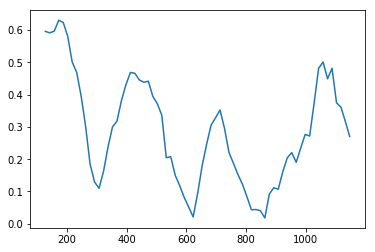

In [248]:
import matplotlib.pyplot as plt
plt.plot(vec_to_sim_dic.keys(),vec_to_sim_dic.values())

In [249]:
val = list(vec_to_sim_dic.keys())[-1]//one_topic + 1
val
part = []
for i in range(val):
    p = [value for idx, value in vec_to_sim_dic.items() if one_topic*i< idx <=one_topic*(i+1)]
    part.append(p)
part_min = []
for p in part:
    part_min.append(min(p))
part_min
sort_min_list=sorted(part_min)
sort_min_list

[0.018142436494739247,
 0.02125291543821921,
 0.10993706439343164,
 0.2704866353865129,
 0.39594743250660835]

In [251]:
minimum1_1=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[0]]
minimum1_2=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[1]]
minimum1_3=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[2]]
print(minimum1_1)
print(minimum1_2)
print(minimum1_3)

[863]
[623]
[308]


In [252]:
minimum=[minimum1_1[0]].copy()
minimum.append(minimum1_2[0])
minimum.append(minimum1_3[0])

In [253]:
sort_minimum=sorted(minimum)
sort_minimum

[308, 623, 863]

In [254]:
k=3
min_key = []
for i in range(k):
    minimum = [token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[i]]
    min_key.append(minimum[0])
print(min_key)
sort_min_key=sorted(min_key)
print(sort_min_key)

[863, 623, 308]
[308, 623, 863]


In [255]:
token_list_allword[sort_min_key[0]]
idx1 = token_list_allword[sort_min_key[0]].index
lexrank.sentences[idx1].text

'서울 시내 한 대학 관계자는 아무래도 KTX가 새로 생기면서 버스보다 기차를 선호하는 학생들이 많아진 것 아니겠냐라면서 올해는 연휴도 짧고 취업난이라는 외부적 상황 때문에 귀향하는 학생이 줄어들 것으로 추정된다고 말했다'

In [256]:
## 찾아낸 경계 토큰으로 클러스터 나누기
## 토큰이 문장의 앞뒤로 나눈 절반 중 어디에 속한지 알아내서 경계 나눔
start = 0
cluster = []
for b in sort_min_key:
    token = token_list_allword[b]
    idx = token.index
    sen_tokens = [t.word for t in lexrank.sentences[token.index].tokens]
    pos = sen_tokens.index(str(token))
    if(pos<len(sort_min_key)//2):
        cluster.append(lexrank.sentences[start:idx+1])
        start=idx+1
    else:
        cluster.append(lexrank.sentences[start:idx])
        start=idx
if(start<len(lexrank.sentences)):
    cluster.append(lexrank.sentences[start:])
## 클러스터별 문장과 각 페이지랭크 값 출력
for i, c in enumerate(cluster):
    print("[cluster{}]".format(i+1))
    for j, s in enumerate(c):
        print("문장{}: {}".format(j, s.text))

[cluster1]
문장0: 추석에 고향 내려가려는데 뒤늦게 학교 귀향 버스가 없어진 것을 알았어요
문장1: 급하게 버스표를 예매하느라 앞당겨서 출발해요
문장2: 고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다
문장3: 최근 학생들을 태우고 추석마다 지방으로 내려가던 서울 시내 대학들의 귀향 버스가 점차 사라지는 추세다
문장4: 22일 서울대 총학생회에 따르면 올해 추석 시간대별 노선당 인원이 기준인 35명보다 적어 귀향 버스 전 노선을 운영하지 않는다
문장5: 총학생회는 애초 7개 노선을 운행하기 위한 수요조사를 했지만, 신청자가 26명에 불과했다
문장6: 지난해 신청자가 35명에 그쳐 귀향 버스를 운행하지 않은 데 이어 2년째 운행하지 않으면서 사실상 귀향 버스 폐지 수순을 밟고 있다
문장7: 서울대 귀향 버스는 10년 전인 2008년에는 신청자가 600여명에 달한 것으로 알려졌다
문장8: 복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다
문장9: 하지만 이후 귀향 버스 신청자는 점차 감소했다
문장10: 2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다
문장11: 총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다
문장12: 연세대도 올해 추석 때 귀향 버스를 운영하지 않는다
문장13: 연세대 관계자는 점점 귀향 버스를 이용하는 학생이 줄다가 지난해에는 1~2대 운행한 것으로 안다고 밝혔다
문장14: 서강대 역시 올해 귀향 버스를 운행하지 않는다
문장15: 이화여대는 한가위 귀향단으로 이름 붙인 귀향 버스 운행을 2015년 중단했다
문장16: 당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다
문장17: 고려대는 버스 14대를 

In [272]:
clus1=[]
for s in cluster[0]:
    clus1.append(s.text)
clus2=[]
for s in cluster[1]:
    clus2.append(s.text)
clus3=[]
for s in cluster[2]:
    clus3.append(s.text)
clus4=[]
for s in cluster[3]:
    clus4.append(s.text)    

In [273]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus1)))
len(clus1)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


23

In [274]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다
1 복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다
2 2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다
3 총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다
4 당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다
5 2016년 13개 노선을 운행했지만, 신청자 감소로 지난해 6개 노선을 줄인 데 이어 올해도 지난해 수준을 유지했다


In [275]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus2)))
len(clus2)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


26

In [276]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 이로 인해 추석을 앞두고 청와대 국민청원 게시판에는 명절을 없애자는 청원까지 여러 번 등장했다
1 청원 내용을 보면 대체로 현대 사회에서 대가족이 모여 음식을 하고 차례를 지내는 의미가 퇴색하고 있음을 지적했다
2 실제 지난해 법원행정처 통계에 따르면 2016년 기준 설날과 추석 연휴 전후로 하루 평균 577건의 이혼신청서가 접수됐다
3 시댁을 나서는 순간까지 편히 앉아 있지를 못했다라고 명절 스트레스를 호소했다
4 정부에서도 성 평등이 실현되는 명절 문화를 홍보하고 안내해주기 바란다는 의견도 있었다
5 한국 상담대학원 대학교 이남옥 교수는 YTN PLUS에 명절 스트레스로 인한 부부 상담 사례가 실제로 많다
6 그러면서 명절은 즐거운 날이지만 유독 며느리들에게 힘들게 느껴지는 이유는 며느리의 노동을 당연시하기 때문이라고 지적했다


In [277]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus3)))
len(clus3)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


12

In [278]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 자신이 만든 노래를 선보이러 간 자리가 성폭행 범행 장소로 변했다면서, 사무실 모습과 중역의 행동 등 성폭행 당시 상황을 비교적 상세하게 묘사했다
1 그러나 데이비스는 성폭행이 발생한 달이 몇 월인지, 당시 사무실에 도착했을 때 그의 조수가 거기에 있었는지, (성폭행을 당한 뒤) 그의 사무실을 떠날 때 서로가 무슨 얘기를 했는지도 기억하지 못한다고 언급했다
2 데이비스는 포드가 그 사건이 발생한 곳이 어딘지, 누구 집이었는지 그리고 어느 해였는지 등을 기억하지 못한다고 비난받고 있지만, 성폭행 자체에 대한 그녀의 기억은 선명하고도 상세하다고 지적했다


In [280]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus4)))
len(clus4)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


19

In [281]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 21일 자유한국당 추경호 의원실이 기획재정부 등으로부터 받은 자료에 따르면 지난 5월 국회를 통과한 일자리 추경예산 3조8000억원 중 현장에 풀린 돈은 지난달 말 기준 1조7000억원이다
1 자동차산업 퇴직 인력의 전환 교육 및 재취업 지원에 쓰겠다며 한국산업기술진흥원에 보낸 81억원, 공공 분야 드론 조종 인력 양성에 쓰겠다던 50억원 등 총 5858억원의 일자리 추경예산이 한 푼도 집행되지 못했다
2 예비타당성 조사(예타) 면제 사업 중 올해 예산 규모가 가장 큰 중소벤처기업부의 기술 혁신형 창업 기업 지원 사업(1013억원)의 경우 지난달 기준 실집행률이 3%에 불과하다
3 일각에서는 44.7%의 전체 실집행률에 대해 낮은 것은 아니다는 주장도 나온다
4 실제로 대출(13개 사업)과 출자(2개) 관련 사업을 제외하면 일자리 추경의 실집행률은 23%(2조1300억원 중 4898억원)로 떨어진다


In [337]:
#########NOISE########

In [386]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus1)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [387]:
clus1_sorted = lexrank.sentences
clus1_sorted = sorted(clus1_sorted, key=lambda x: x.pagerank, reverse=True)
for s in clus1_sorted:
    print(s.text)
    print(s.pagerank)

당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다
0.5
당시 연세대, 서강대, 이화여대 등 서부지역 대학생 4천200여명이 귀향 버스를 이용한 바 있다
0.5
2016년 13개 노선을 운행했지만, 신청자 감소로 지난해 6개 노선을 줄인 데 이어 올해도 지난해 수준을 유지했다
0.35360940815070446
한양대는 지난해 추석에 이어 올해 추석에도 6개 노선 6대 버스를 운행한다
0.3349573680201495
고려대는 버스 14대를 대절해 13개 노선을 운영한다
0.3114332238291458
2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다
0.2798228182459831
지난해 신청자가 35명에 그쳐 귀향 버스를 운행하지 않은 데 이어 2년째 운행하지 않으면서 사실상 귀향 버스 폐지 수순을 밟고 있다
0.2502990877821322
지난해 귀향 버스 신청자가 290여명이었지만 올해는 236명으로 줄었다
0.24927498669611556
이화여대는 한가위 귀향단으로 이름 붙인 귀향 버스 운행을 2015년 중단했다
0.22060310727576887
고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다
0.12647083004249185
복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다
0.10982743654991546
총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다
0.10523481205652475
최근 학생들을 태우고 추석마다 지방으로 내려가던 서울 시내 대학들의 귀향 버스가 점차 사라지는 추세다
0.10450094007167642
추석에 고향 내려가려는데 뒤늦게 학교 귀향 버스가 없어진 것을 알았어요
0.1

In [388]:
clus1_pr=[]
for s in clus1_sorted:
    clus1_pr.append(s.pagerank)

<function matplotlib.pyplot.show(*args, **kw)>

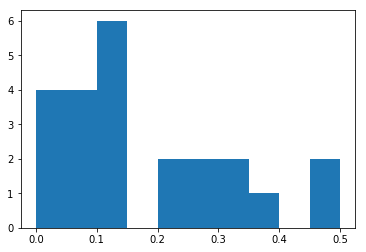

In [389]:
plt.figure()
plt.hist(clus1_pr)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

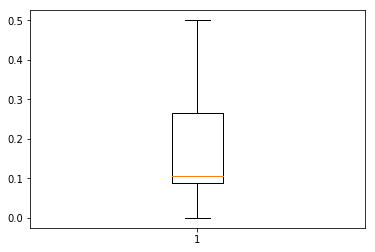

In [390]:
plt.figure()
plt.boxplot(clus1_pr)
plt.show

In [391]:
np.percentile(clus1_pr, 25)

0.08728171467111566

In [392]:
for s in clus1_sorted:
    print(s.text)
    print(s.pagerank)

당시 이화여대 총학생회는 신청자가 100명도 안 되는 가운데 버스대절 비용이 증가해 재정 부담이 커졌다며 귀향 버스 복지 사업을 폐지한다고 밝힌 바 있다
0.5
당시 연세대, 서강대, 이화여대 등 서부지역 대학생 4천200여명이 귀향 버스를 이용한 바 있다
0.5
2016년 13개 노선을 운행했지만, 신청자 감소로 지난해 6개 노선을 줄인 데 이어 올해도 지난해 수준을 유지했다
0.35360940815070446
한양대는 지난해 추석에 이어 올해 추석에도 6개 노선 6대 버스를 운행한다
0.3349573680201495
고려대는 버스 14대를 대절해 13개 노선을 운영한다
0.3114332238291458
2015년 255명이었던 신청자는 2016년에는 46명으로 급감했다
0.2798228182459831
지난해 신청자가 35명에 그쳐 귀향 버스를 운행하지 않은 데 이어 2년째 운행하지 않으면서 사실상 귀향 버스 폐지 수순을 밟고 있다
0.2502990877821322
지난해 귀향 버스 신청자가 290여명이었지만 올해는 236명으로 줄었다
0.24927498669611556
이화여대는 한가위 귀향단으로 이름 붙인 귀향 버스 운행을 2015년 중단했다
0.22060310727576887
고향이 부산인 서울대 4학년 조모(24)씨는 추석을 맞아 일반 버스를 예매해 고향에 내려간다며 이같이 말했다
0.12647083004249185
복잡한 터미널 대신 학교에서 모여 출발하고, 가격도 일반 버스보다 저렴해 많은 학생이 애용했다
0.10982743654991546
총학생회 관계자는 수요조사 결과가 너무 적게 나와서 우리도 놀랐다며 추석 때 집에 안 가는 학생도 많고, 다른 방법으로 귀향하는 학생도 많은 것 같다고 설명했다
0.10523481205652475
최근 학생들을 태우고 추석마다 지방으로 내려가던 서울 시내 대학들의 귀향 버스가 점차 사라지는 추세다
0.10450094007167642
추석에 고향 내려가려는데 뒤늦게 학교 귀향 버스가 없어진 것을 알았어요
0.1

In [393]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus2)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [394]:
clus2_sorted = lexrank.sentences
clus2_sorted = sorted(clus2_sorted, key=lambda x: x.pagerank, reverse=True)
clus2_pr=[]
for s in clus2_sorted:
    clus2_pr.append(s.pagerank)
np.percentile(clus2_pr, 25)

0.08819867840491086

In [395]:
for s in clus2_sorted:
    print(s.text)
    print(s.pagerank)

청원 내용을 보면 대체로 현대 사회에서 대가족이 모여 음식을 하고 차례를 지내는 의미가 퇴색하고 있음을 지적했다
0.5
실제 지난해 법원행정처 통계에 따르면 2016년 기준 설날과 추석 연휴 전후로 하루 평균 577건의 이혼신청서가 접수됐다
0.5
명절 아닌 평상시 하루 평균 이혼 신청이 298건인 것과 비교하면 두 배 수준이다
0.5
자신을 결혼 20년 차 주부라고 밝힌 한 청원자는 차례를 지내는 집은 명절이 갈등과 스트레스의 원인이라며 제사가 따로 있는데, 왜 명절에 차례를 지내야 하나라고 의문을 제기했다
0.5
한국 상담대학원 대학교 이남옥 교수는 YTN PLUS에 명절 스트레스로 인한 부부 상담 사례가 실제로 많다
0.49999999999999994
이 교수는 실제로 아내가 명절에 시댁을 가기 싫다고 하자 남편이 발로 차면서 얼른 일어나라고 소리쳐 이혼 상담을 온 사례도 있었다고 설명했다
0.49999999999999994
그러면서 명절은 즐거운 날이지만 유독 며느리들에게 힘들게 느껴지는 이유는 며느리의 노동을 당연시하기 때문이라고 지적했다
0.49999999999999994
이 교수는 먼저 며느리가 시댁에 자신의 의견을 말할 수 있는 분위기를 만들어 가야 한다고 강조했다
0.49999999999999994
정부에서도 성 평등이 실현되는 명절 문화를 홍보하고 안내해주기 바란다는 의견도 있었다
0.3486897459807794
시댁을 나서는 순간까지 편히 앉아 있지를 못했다라고 명절 스트레스를 호소했다
0.3424818474358358
또 다른 청원자는 명절에 시댁에 가자마자 앞치마 두른다
0.33947222072857813
그러나 이렇게 명절마다 간소화, 폐지 요구가 나온다면, 꼭 정부 차원이 아니더라도 가정마다 변화를 고민해 봐야 할 문제임은 분명해 보인다
0.3317346525673597
명절 덕분에 오랜만에 가족을 만난다, 차례 간소화는 각 집안의 문제, 그래도 명절은 명절과 같은 의견이 많기 때문이다
0.31957560145186087
여성이 차

In [396]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus3)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [397]:
clus3_sorted = lexrank.sentences
clus3_sorted = sorted(clus3_sorted, key=lambda x: x.pagerank, reverse=True)
clus3_pr=[]
for s in clus3_sorted:
    clus3_pr.append(s.pagerank)
np.percentile(clus3_pr, 25)

0.0723390571290921

In [398]:
for s in clus3_sorted:
    print(s.text)
    print(s.pagerank)

그러나 데이비스는 성폭행이 발생한 달이 몇 월인지, 당시 사무실에 도착했을 때 그의 조수가 거기에 있었는지, (성폭행을 당한 뒤) 그의 사무실을 떠날 때 서로가 무슨 얘기를 했는지도 기억하지 못한다고 언급했다
0.09905515795485301
데이비스는 포드가 그 사건이 발생한 곳이 어딘지, 누구 집이었는지 그리고 어느 해였는지 등을 기억하지 못한다고 비난받고 있지만, 성폭행 자체에 대한 그녀의 기억은 선명하고도 상세하다고 지적했다
0.09824077645203334
자신이 만든 노래를 선보이러 간 자리가 성폭행 범행 장소로 변했다면서, 사무실 모습과 중역의 행동 등 성폭행 당시 상황을 비교적 상세하게 묘사했다
0.09271935527084865
데비이스는 포드가 의회 청문회에서 아프고 끔찍한 과거의 기억을 떠올리기 전에 미 연방수사국(FBI)의 조사가 선행돼야 한다고 주장한 데 대해서도 용감한 요청이라며 동감을 표시했다
0.09116503138249339
캐버노를 대법관으로 지명한 도널드 트럼프 대통령이 성폭행 의혹에 대해 우리가 (사건이 발생한) 날짜와 시간, 장소를 알 수 있도록 관련 기록을 제시해줄 것을 요청한다며 물증을 요구한 데 대한 반박으로도 해석된다
0.08969905464628784
고(故) 로널드 레이건 전 미국 대통령의 딸 패티 데이비스가 약 40년 전 자신이 성폭행당한 사실을 고백하면서, 브렛 캐버노 미 연방대법관 지명자를 상대로 30여 년 전 성폭행 미수 의혹을 제기한 크리스틴 포드를 옹호했다
0.08491658527362417
데이비스는 21일(현지시간) 미 일간 워싱턴포스트 기고문을 통해 자신이 과거 한 저명한 음악업계 중역의 사무실에서 성폭행을 당했다고 주장했다
0.08006710005649323
그러면서 데이비스는 최근 캐버노 지명자를 상대로 고교 시설 성폭행 미수 의혹을 제기한 크리스틴 포드를 언급, 캐버노 지명자의 짓이라며 폭로한 그 성폭행 시도를 30년 넘게 얘기하지 않은 것이 내게는 조금도 놀랍지 않다고 옹호했다
0.07

In [399]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus4)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [400]:
clus4_sorted = lexrank.sentences
clus4_sorted = sorted(clus4_sorted, key=lambda x: x.pagerank, reverse=True)
clus4_pr=[]
for s in clus4_sorted:
    clus3_pr.append(s.pagerank)
np.percentile(clus3_pr, 25)

0.09043204301439062

In [401]:
for s in clus3_sorted:
    print(s.text)
    print(s.pagerank)

그러나 데이비스는 성폭행이 발생한 달이 몇 월인지, 당시 사무실에 도착했을 때 그의 조수가 거기에 있었는지, (성폭행을 당한 뒤) 그의 사무실을 떠날 때 서로가 무슨 얘기를 했는지도 기억하지 못한다고 언급했다
0.09905515795485301
데이비스는 포드가 그 사건이 발생한 곳이 어딘지, 누구 집이었는지 그리고 어느 해였는지 등을 기억하지 못한다고 비난받고 있지만, 성폭행 자체에 대한 그녀의 기억은 선명하고도 상세하다고 지적했다
0.09824077645203334
자신이 만든 노래를 선보이러 간 자리가 성폭행 범행 장소로 변했다면서, 사무실 모습과 중역의 행동 등 성폭행 당시 상황을 비교적 상세하게 묘사했다
0.09271935527084865
데비이스는 포드가 의회 청문회에서 아프고 끔찍한 과거의 기억을 떠올리기 전에 미 연방수사국(FBI)의 조사가 선행돼야 한다고 주장한 데 대해서도 용감한 요청이라며 동감을 표시했다
0.09116503138249339
캐버노를 대법관으로 지명한 도널드 트럼프 대통령이 성폭행 의혹에 대해 우리가 (사건이 발생한) 날짜와 시간, 장소를 알 수 있도록 관련 기록을 제시해줄 것을 요청한다며 물증을 요구한 데 대한 반박으로도 해석된다
0.08969905464628784
고(故) 로널드 레이건 전 미국 대통령의 딸 패티 데이비스가 약 40년 전 자신이 성폭행당한 사실을 고백하면서, 브렛 캐버노 미 연방대법관 지명자를 상대로 30여 년 전 성폭행 미수 의혹을 제기한 크리스틴 포드를 옹호했다
0.08491658527362417
데이비스는 21일(현지시간) 미 일간 워싱턴포스트 기고문을 통해 자신이 과거 한 저명한 음악업계 중역의 사무실에서 성폭행을 당했다고 주장했다
0.08006710005649323
그러면서 데이비스는 최근 캐버노 지명자를 상대로 고교 시설 성폭행 미수 의혹을 제기한 크리스틴 포드를 언급, 캐버노 지명자의 짓이라며 폭로한 그 성폭행 시도를 30년 넘게 얘기하지 않은 것이 내게는 조금도 놀랍지 않다고 옹호했다
0.07